In [1]:
import pandas as pd

# Exercise 1

Find the value that occurs most often in these columns:
1. Developer
2. Rating

In [31]:
url = 'https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/games_of_all_time.csv'
df = pd.read_csv(url)

print("Most common value(s) (modes):")
print(df["developer"].mode())
print(df["rating"].mode())

print(df["developer"].value_counts())

display(df[(df["developer"]=="Square Enix") & (df["game_name"].str.startswith("Kingdom"))])

Most common value(s) (modes):
0    Capcom
Name: developer, dtype: object
0    T
Name: rating, dtype: object
developer
Capcom            150
Nintendo          130
Telltale Games    104
Konami             86
Square Enix        76
                 ... 
Starcolt            1
Hot Lava Games      1
V1 Interactive      1
BeeWorks            1
Kenny Creanor       1
Name: count, Length: 2927, dtype: int64


,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
741,Kingdom Hearts: Birth by Sleep,82.0,86.0,['psp'],"Long before Sora was chosen by his Keyblade, t...",https://www.metacritic.com/game/psp/kingdom-he...,Square Enix,"['Role-Playing', 'Action RPG']",singleplayer,E10+
1090,Kingdom Hearts III,80.0,82.0,['xbox-one'],KINGDOM HEARTS III tells the story of the powe...,https://www.metacritic.com/game/xbox-one/kingd...,Square Enix,"['Action RPG', 'Action Adventure', 'Fantasy', ...",singleplayer,E10+
1322,Kingdom Hearts HD 1.5 ReMIX,77.0,88.0,['playstation-3'],"In KINGDOM HEARTS HD 1.5 ReMIX, players can in...",https://www.metacritic.com/game/playstation-3/...,Square Enix,"['Miscellaneous', 'Compilation']",singleplayer,E10+
6187,Kingdom Hearts HD 2.5 ReMIX,81.0,89.0,['playstation-3'],KINGDOM HEARTS HD 2.5 ReMIX is an HD remastere...,https://www.metacritic.com/game/playstation-3/...,Square Enix,"['Role-Playing', 'Action RPG', 'Miscellaneous'...",singleplayer,E10+
6188,Kingdom Hearts HD 2.8 Final Chapter Prologue,76.0,82.0,['playstation-4'],KINGDOM HEARTS HD 2.8 Final Chapter Prologue i...,https://www.metacritic.com/game/playstation-4/...,Square Enix,"['Miscellaneous', 'Compilation', 'Role-Playing...",singleplayer,E10+
6189,Kingdom Hearts II,87.0,90.0,['playstation-2'],"It has been a year since the events of ""Kingdo...",https://www.metacritic.com/game/playstation-2/...,Square Enix,"['Role-Playing', 'Action RPG']",singleplayer,E10+
6190,Kingdom Hearts: Melody of Memory,74.0,74.0,['playstation-4'],Experience the music of kingdom hearts like ne...,https://www.metacritic.com/game/playstation-4/...,Square Enix,"['Action', 'Rhythm', 'Music']",multiplayer,E10+


# Exercise 2

Which two columns have the strongest correlation?

In [55]:
url = 'https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/spotify_top50_2021.csv'
df = pd.read_csv(url)

dfCorr = df.select_dtypes(include=["number"]).corr()

# Unpivot
dfCorr2 = dfCorr.unstack().reset_index(name="correlation")

# Scrub out same-column correlations
dfCorr2 = dfCorr2[dfCorr2["level_0"] != dfCorr2["level_1"]]

# Create another column for the absolute value
dfCorr2["correlation_abs"] = abs(dfCorr2["correlation"])

# Sort
dfCorr2.sort_values(by="correlation_abs", ascending=False, inplace=True)

display(dfCorr2)

,level_0,level_1,correlation,correlation_abs
78,loudness,energy,0.749475,0.749475
50,energy,loudness,0.749475,0.749475
53,energy,acousticness,-0.675219,0.675219
123,acousticness,energy,-0.675219,0.675219
83,loudness,acousticness,-0.629024,0.629024
...,...,...,...,...
19,popularity,key,-0.006061,0.006061
127,acousticness,speechiness,-0.005745,0.005745
113,speechiness,acousticness,-0.005745,0.005745
76,loudness,popularity,0.000690,0.000690


In [48]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 6, 8, 10],
    'C': [3, 6, 9, 12, 15],
    'D': [4, 8, 12, 16, 20]
}
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = correlation_matrix.where(~correlation_matrix.mask(pd.np.tril(pd.np.ones(correlation_matrix.shape)).astype(pd.bool)))

# Find the maximum correlation coefficient (excluding NaN values)
max_corr = upper_triangle.max().max()

# Identify the columns corresponding to the maximum correlation coefficient
col1, col2 = (upper_triangle == max_corr).stack().idxmax()

print("The two most strongly correlated columns are:", col1, "and", col2, "with correlation coefficient:", max_corr)

AttributeError: module 'pandas' has no attribute 'np'

                        id  popularity  danceability    energy       key  \
id                1.000000   -0.231462      0.171220 -0.103420 -0.114533   
popularity       -0.231462    1.000000     -0.275659  0.085398 -0.006061   
danceability      0.171220   -0.275659      1.000000  0.424101  0.266594   
energy           -0.103420    0.085398      0.424101  1.000000  0.020071   
key              -0.114533   -0.006061      0.266594  0.020071  1.000000   
loudness         -0.007781    0.000690      0.466949  0.749475  0.026175   
mode              0.015704    0.240455     -0.194921 -0.165835 -0.296727   
speechiness      -0.046188   -0.039281      0.258465 -0.068540  0.119803   
acousticness      0.104926    0.068833     -0.524703 -0.675219 -0.133163   
instrumentalness  0.141411    0.066601      0.088759 -0.098496  0.300551   
liveness         -0.065445    0.165771     -0.231599  0.130796 -0.198790   
valence          -0.043711   -0.068797      0.360962  0.513768  0.119263   
tempo       

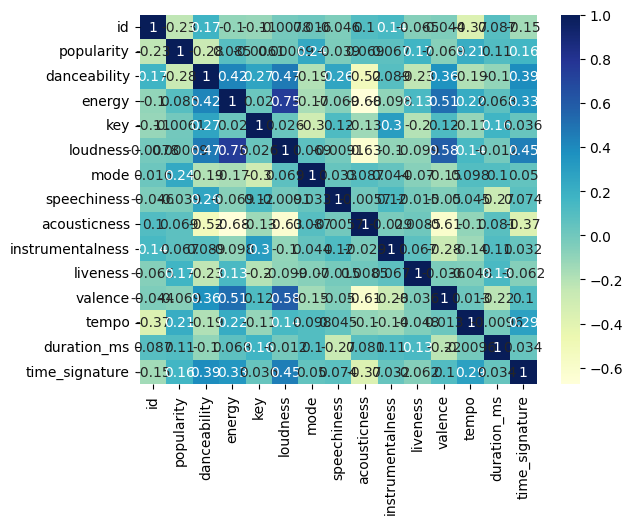

In [45]:
import pandas as pd
import matplotlib.pyplot as mp 
import pandas as pd 
import seaborn as sb 

url = 'https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/spotify_top50_2021.csv'
df = pd.read_csv(url)

df.describe(include="all")

print(df.corr(method ='pearson',numeric_only=True))

dataplot = sb.heatmap(df.corr(method ='pearson',numeric_only=True), cmap="YlGnBu", annot=True) 
mp.show()

# Exercise 3
Calculate the most meaningful statistical measure for these columns:
- Company size
- Salary in USD
- Work Year

In [58]:
url = 'https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/ds_salaries.csv'
df = pd.read_csv(url)
df.describe(include="all")
#display(df)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN
